In [6]:
from HGCalImageAlgo3D import *
from utility_benchmark import *
from timeit import default_timer as timer


%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

DatasetDir  = '/Users/zihengchen/Documents/HGCal/workplace/data/'
DatasetFile = 'CMSSW93X_pt35_pu200'
#%run ../scripts/utility_getinputhits_genpart.py $DatasetDir $DatasetFile 6 100

In [2]:
df = pd.read_hdf(DatasetDir+"input/"+DatasetFile+"_rechit.h5",key="table")

# 1. Run clustering

In [ ]:
SetImagingAlgo()
dfresultclus = RunImagingAlgo(df,N=100)
dfresultclus.to_pickle("../data/output/"+DatasetFile+"_OutputClus.pkl")

  2%|▏         | 2/99 [00:29<23:12, 14.35s/it]

In [22]:
def test(a,b,c,d):
    SetImagingAlgo(AFFINITY_Z_  = a, #cm
                   KERNAL_R_    = b, 
                   KERNAL_Z_    = 2*a, 
                   KERNAL_EXPC_ = 0.5, 
                   MAXDISTANCE_ = 200, #cm
                   DECISION_RHO_KAPPA_ = 10,
                   DECISION_NHD_= c,#cm
                   CONTINUITY_NHD_ = d#cm
                  )
    dfresultclus = RunImagingAlgo(df,N=100)
    dfresultclus.to_pickle(DatasetDir+"output/{}/{:02.1f}_{:02.1f}_{:02.1f}_{:02.1f}.pkl".format(DatasetFile,a,b,c,d))

for t in np.arange(0.4,2.4,0.1):
    test(t,4.0,4.0,6.0)

100%|██████████| 99/99 [00:12<00:00,  8.18it/s]


In [40]:
import glob  
DatasetFile = 'CMSSW93X_pt35_pu000'
pickle_list = glob.glob(DatasetDir+"output/{}/".format(DatasetFile)+"/*.pkl")
temp = []
for pkl in pickle_list:
    energyeff_pu000 = energyeff(DatasetDir,DatasetFile,N=100,deltarho=100, test=pkl)
    eff,ave = effsigma(energyeff_pu000)
    print("{:20}:{:6.3f}GeV, {:6.3f}GeV".format(pkl[-20:],eff,ave))
    temp.append(eff)
temp100 = np.array(temp)

/0.4_4.0_4.0_6.0.pkl: 0.105GeV,  0.848GeV
/0.5_4.0_4.0_6.0.pkl: 0.106GeV,  0.830GeV
/0.6_4.0_4.0_6.0.pkl: 0.107GeV,  0.841GeV
/0.7_4.0_4.0_6.0.pkl: 0.107GeV,  0.828GeV
/0.8_4.0_4.0_6.0.pkl: 0.105GeV,  0.832GeV
/0.9_4.0_4.0_6.0.pkl: 0.105GeV,  0.821GeV
/1.0_4.0_4.0_6.0.pkl: 0.105GeV,  0.825GeV
/1.1_4.0_4.0_6.0.pkl: 0.101GeV,  0.825GeV
/1.2_4.0_4.0_6.0.pkl: 0.102GeV,  0.827GeV
/1.3_4.0_4.0_6.0.pkl: 0.104GeV,  0.828GeV
/1.4_4.0_4.0_6.0.pkl: 0.104GeV,  0.827GeV
/1.5_4.0_4.0_6.0.pkl: 0.107GeV,  0.814GeV
/1.6_4.0_4.0_6.0.pkl: 0.103GeV,  0.816GeV
/1.7_4.0_4.0_6.0.pkl: 0.102GeV,  0.825GeV
/1.8_4.0_4.0_6.0.pkl: 0.107GeV,  0.827GeV
/1.9_4.0_4.0_6.0.pkl: 0.104GeV,  0.826GeV
/2.0_4.0_4.0_6.0.pkl: 0.103GeV,  0.819GeV
/2.1_4.0_4.0_6.0.pkl: 0.104GeV,  0.824GeV
/2.2_4.0_4.0_6.0.pkl: 0.102GeV,  0.813GeV
/2.3_4.0_4.0_6.0.pkl: 0.104GeV,  0.821GeV


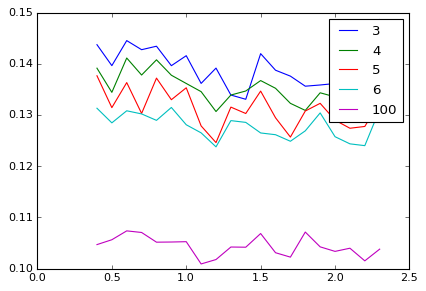

In [41]:
plt.plot(np.arange(0.4,2.4,0.1),temp3,label='3')
plt.plot(np.arange(0.4,2.4,0.1),temp4,label='4')
plt.plot(np.arange(0.4,2.4,0.1),temp5,label='5')
plt.plot(np.arange(0.4,2.4,0.1),temp6,label='6')
plt.plot(np.arange(0.4,2.4,0.1),temp100,label='100')
plt.legend()

# 2. Resolution Plots

In [2]:
gene,cluse,clusn = getoutputclust(DatasetDir,DatasetFile,N=100,deltarho=5)
eff,ave          = effsigma(cluse/gene)
print("{:15.15}{:6.3f}, {:6.3f}".format(DatasetFile,eff,ave))

CMSSW93X_pt35_p 0.123,  0.818


In [5]:
deltarho = 5
energyeff_pu000 = energyeff(DatasetDir,'CMSSW93X_pt35_pu000',N=100,deltarho=5)
energyeff_pu200 = energyeff(DatasetDir,'CMSSW93X_pt35_pu200',N=100,deltarho=5)

print("noPU:  sigma,mean: {}".format(effsigma(energyeff_pu000)))
print("PU200: sigma,mean: {}".format(effsigma(energyeff_pu200)))
    
plt.hist(energyeff_pu000,bins=np.arange(0-0.025,2.0,0.05),histtype="stepfilled",alpha=0.4,lw=1,label="noPU")
plt.hist(energyeff_pu200,bins=np.arange(0-0.025,2.0,0.05),histtype="stepfilled",alpha=0.4,lw=1,label="PU200")
plt.axvline(1,lw=2,c="k")
plt.grid(True)
plt.legend()
plt.xlabel("ClustEnergy/GenEnergy")
plt.title("SinglePi_pt25, Nevent=100")
plt.savefig("../plot/pu200.png")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zihengchen/Documents/HGCal/workplace/data/output/CMSSW93X_pt35_pu200input/1.0_4.0_4.0_6.0_gen.pkl'